# Analyse Exploratoire des Données - Dataset Vin

## 1. Initialisation et Chargement

#### a. Import des librairies

Dans cette section, nous importons les bibliothèques Python nécessaires à notre analyse :
- pandas & numpy pour la manipulation des données
- matplotlib & seaborn pour la visualisation
- sklearn pour les outils de prétraitement


In [46]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    preprocessing
)

#### b. Chargement des données
Chargement du dataset des vins à partir du fichier CSV. Les données contiennent différentes caractéristiques chimiques des vins ainsi que leur classification.

In [10]:
df_raw = pd.read_csv('../data/vin.csv', index_col=0)

## 2. Aperçu des Données

Examinons les caractéristiques générales de notre dataset :
- Structure des données (types de variables, valeurs manquantes)
- Statistiques descriptives (moyenne, écart-type, quartiles, etc.)

#### a. Informations générales

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  target    

#### b. Statistiques descriptives

In [11]:
df_raw.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

#### c. Exemples concrets

In [60]:
df_raw.head(20)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32               16.8       95.0           2.20   
12    13.75        1.73  2.41               16.0       89.0           2.60   
13    14.75        1.73  2.39               11.4       91.0           3.10   
14    14.38        1.87  2.38               12.0      102.0           3.30   
15    13.63        1.81  2.70               17.2      112.0           2.85   
16    14.30        1.92  2.72               20.0      120.0           2.80   
17    13.83        1.57  2.62               20.0      115.0           2.95   
18    14.19        1.59  2.48               16.5      108.0           3.30   
19    13.64        3.10  2.56               15.2      116.0           2.70   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
5         3.39                  0.34             1.97             6.75  1.05   
6         2.52                  0.30             1.98             5.25  1.02   
7         2.51                  0.31             1.25             5.05  1.06   
8         2.98                  0.29             1.98             5.20  1.08   
9         3.15                  0.22             1.85             7.22  1.01   
10        3.32                  0.22             2.38             5.75  1.25   
11        2.43                  0.26             1.57             5.00  1.17   
12        2.76                  0.29             1.81             5.60  1.15   
13        3.69                  0.43             2.81             5.40  1.25   
14        3.64                  0.29             2.96             7.50  1.20   
15        2.91                  0.30             1.46             7.30  1.28   
16        3.14                  0.33             1.97             6.20  1.07   
17        3.40                  0.40             1.72             6.60  1.13   
18        3.93                  0.32             1.86             8.70  1.23   
19        3.03                  0.17             1.66             5.10  0.96   

    od280/od315_of_diluted_wines  proline    target  
0                           3.92   1065.0  Vin amer  
1                           3.40   1050.0  Vin amer  
2                           3.17   1185.0  Vin amer  
3                           3.45   1480.0  Vin amer  
4                           2.93    735.0  Vin amer  
5                           2.85   1450.0  Vin amer  
6                           3.58   1290.0  Vin amer  
7                           3.58   1295.0  Vin amer  
8                           2.85   1045.0  Vin amer  
9                           3.55   1045.0  Vin amer  
10                          3.17   1510.0  Vin amer  
11                          2.82   1

## 3. Analyse de la Target

Analysons la distribution de notre variable cible (target) pour évaluer l'équilibre des classes dans notre dataset. Un déséquilibre important pourrait nécessiter des techniques de rééchantillonnage.

#### a. Distribution des classes

target
Vin amer        59
Vin sucré       48
Vin éuilibré    71
dtype: int64


<Axes: xlabel='target'>

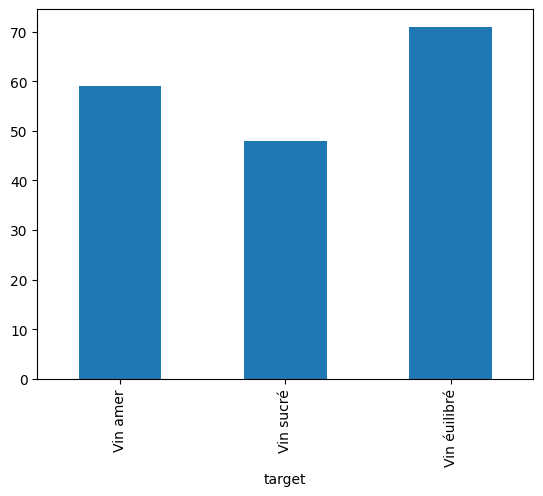

In [61]:
df_target_sizes = df_raw.groupby('target').size()
print(df_target_sizes)
df_raw.groupby('target').size().plot(kind='bar')

#### b. Équilibre des classes

## 4. Analyse des Features

Étude approfondie des variables explicatives :
1. Les boîtes à moustaches nous donnent un aperçu de la distribution et des outliers
2. Les courbes de densité (KDE) montrent la distribution de chaque variable
3. Les KDE par classe permettent de voir le pouvoir discriminant de chaque feature
4. La matrice de corrélation identifie les relations linéaires entre variables
5. Le pairplot montre les relations bivariées et la séparation des classes

In [29]:
features_cols = [col for col in df_raw.columns if (col != "target")]

### 4.1 Distribution des Variables

#### a. Boîtes à moustaches (Vue d'ensemble)

<Axes: >

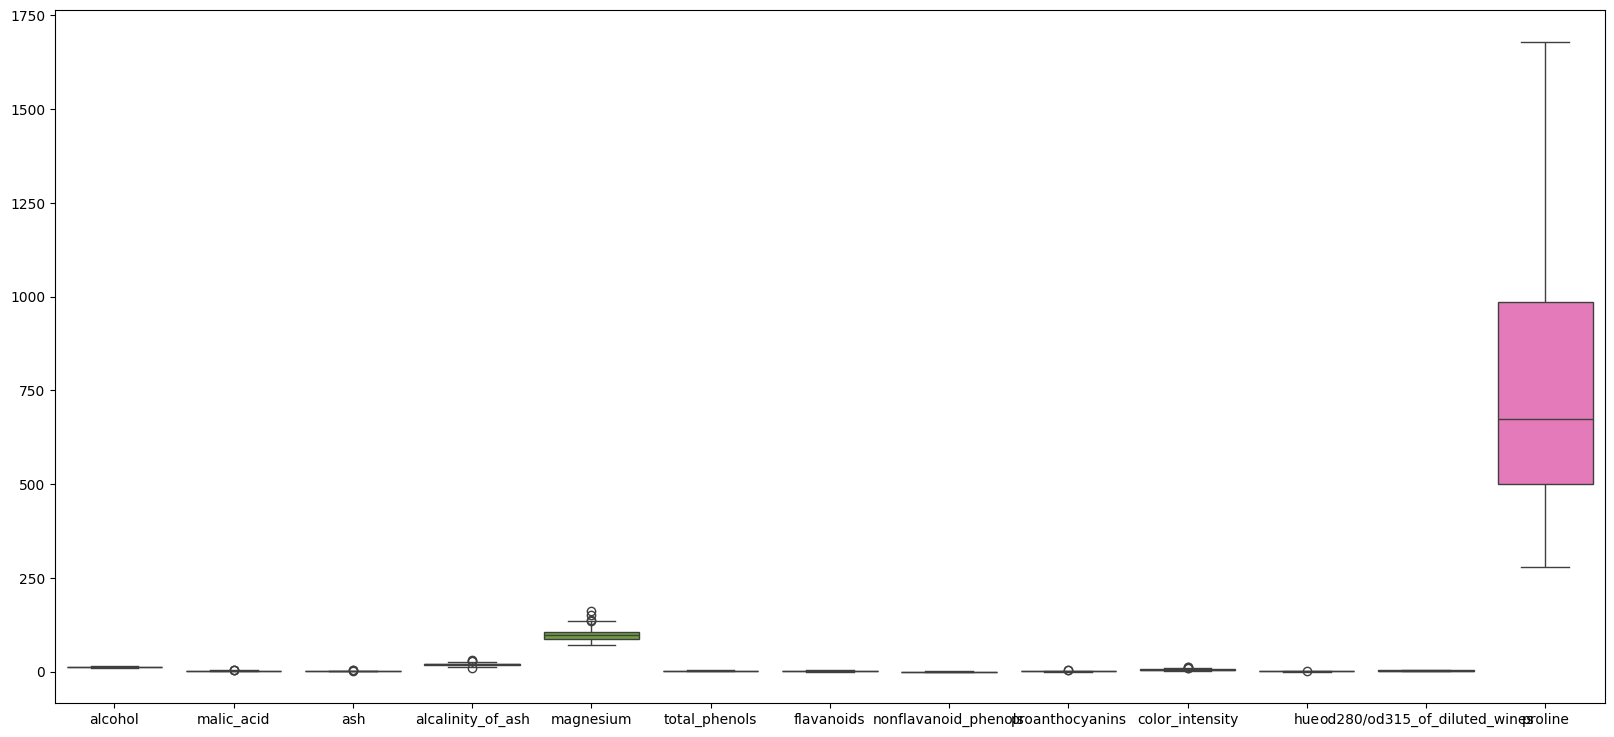

In [30]:
f, ax = plt.subplots(figsize=(20, 9))
sns.boxplot(data=df_raw[features_cols], ax=ax)

#### b. Distribution individuelle (KDE plots)

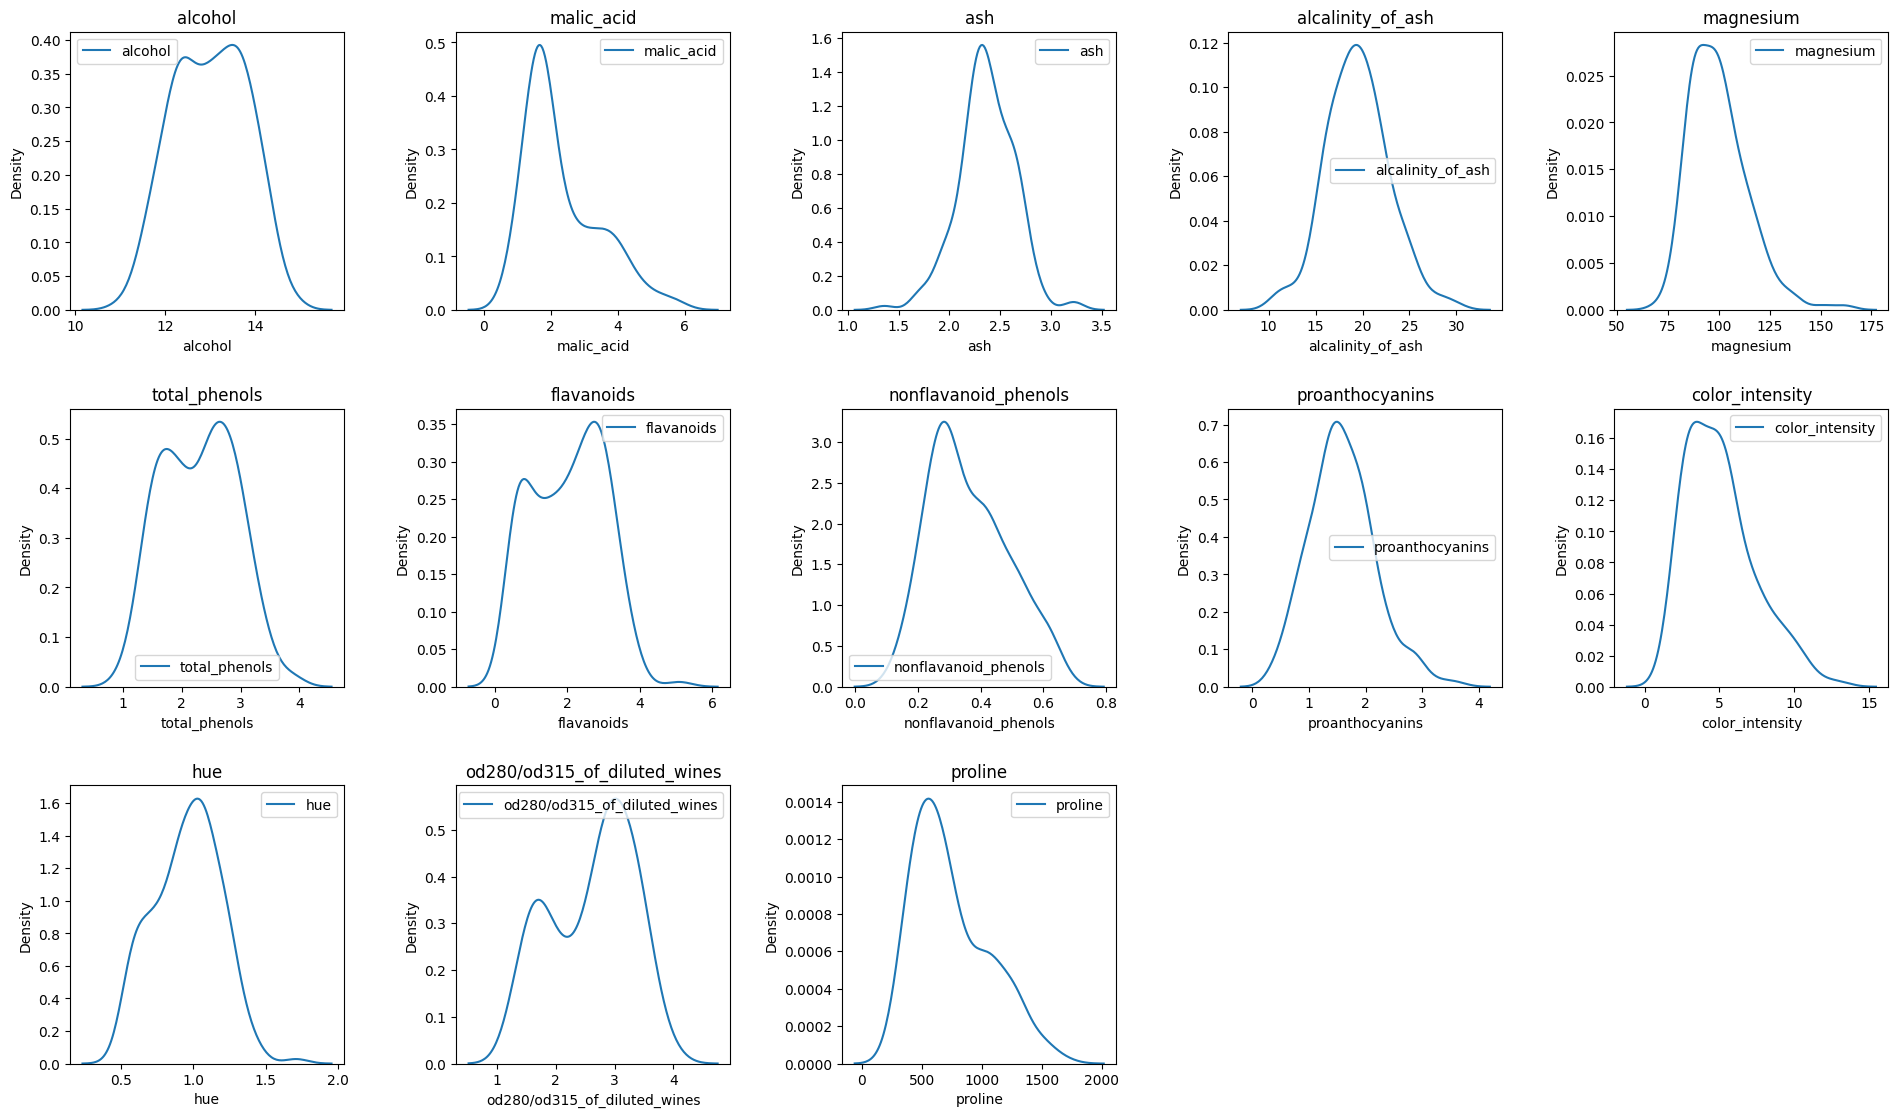

In [56]:
n_cols = 5
n_rows = math.ceil(len(features_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.tight_layout(pad=5.0)

axs = axs.flatten()

for i, col in enumerate(features_cols):
    sns.kdeplot(df_raw[col], ax=axs[i], label=col)
    axs[i].set_title(col)
    axs[i].legend()

for j in range(len(features_cols), len(axs)):
    axs[j].axis('off')

plt.show()

#### c. Distribution par classe (KDE plots avec hue)

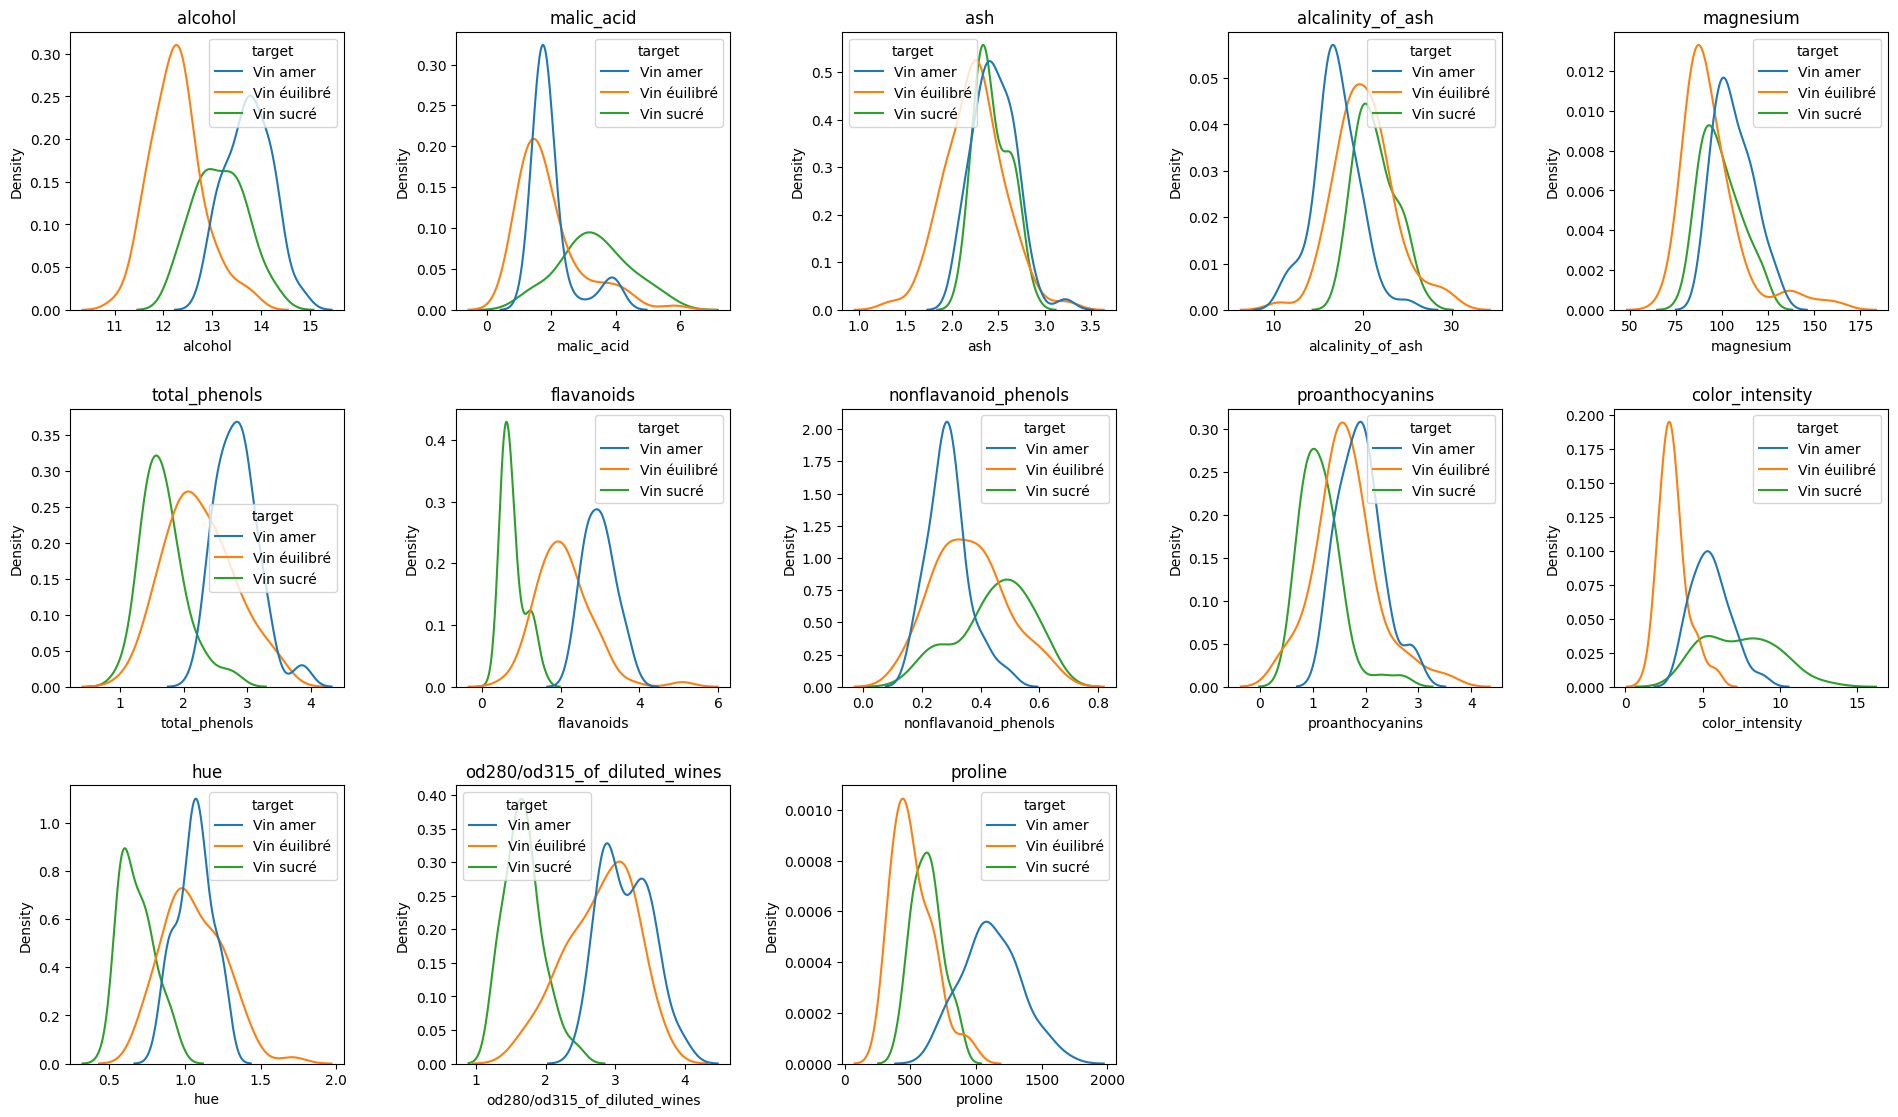

In [43]:
n_cols = 5
n_rows = math.ceil(len(features_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.tight_layout(pad=5.0)

axs = axs.flatten()

for i, col in enumerate(features_cols):
    sns.kdeplot(data=df_raw[[col, 'target']], x=col, hue='target', ax=axs[i])
    axs[i].set_title(col)

for j in range(len(features_cols), len(axs)):
    axs[j].axis('off')

plt.show()


### 4.2 Relations entre Variables

#### a. Matrice de corrélation

<Axes: >

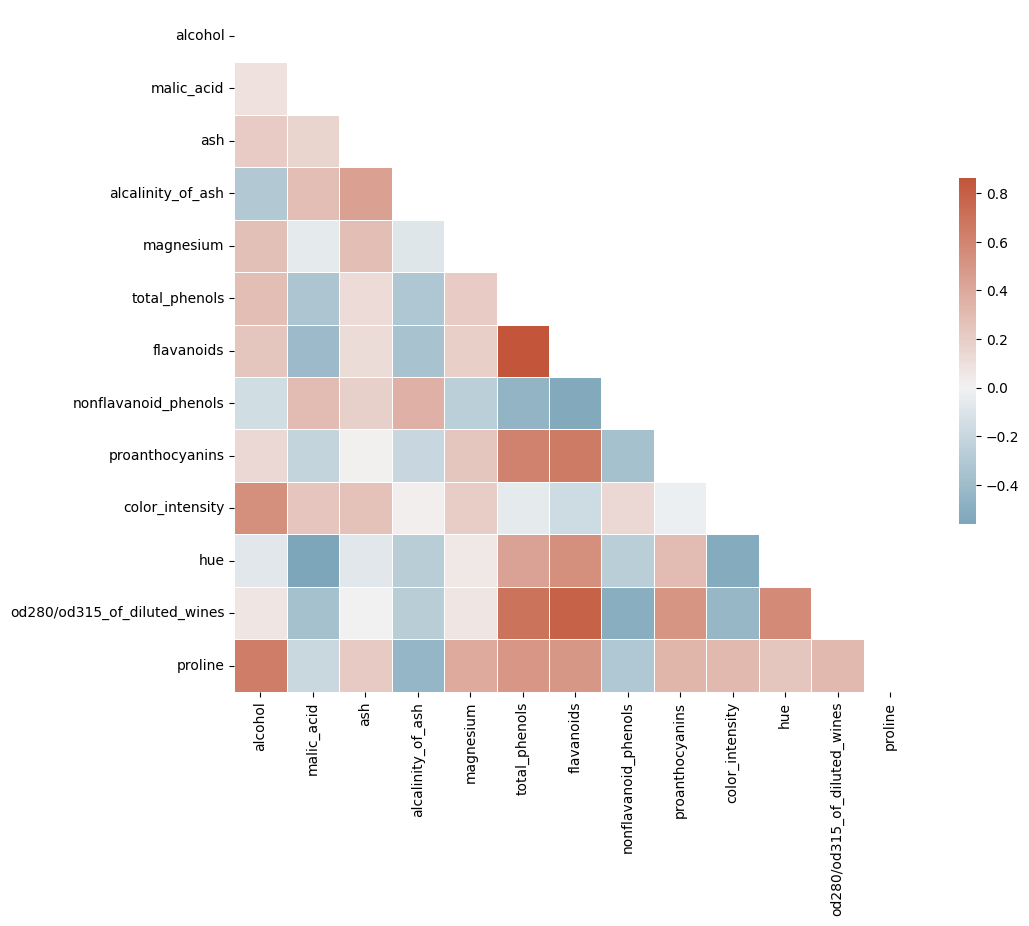

In [45]:
corr = df_raw.drop("target", axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### b. Pairplot

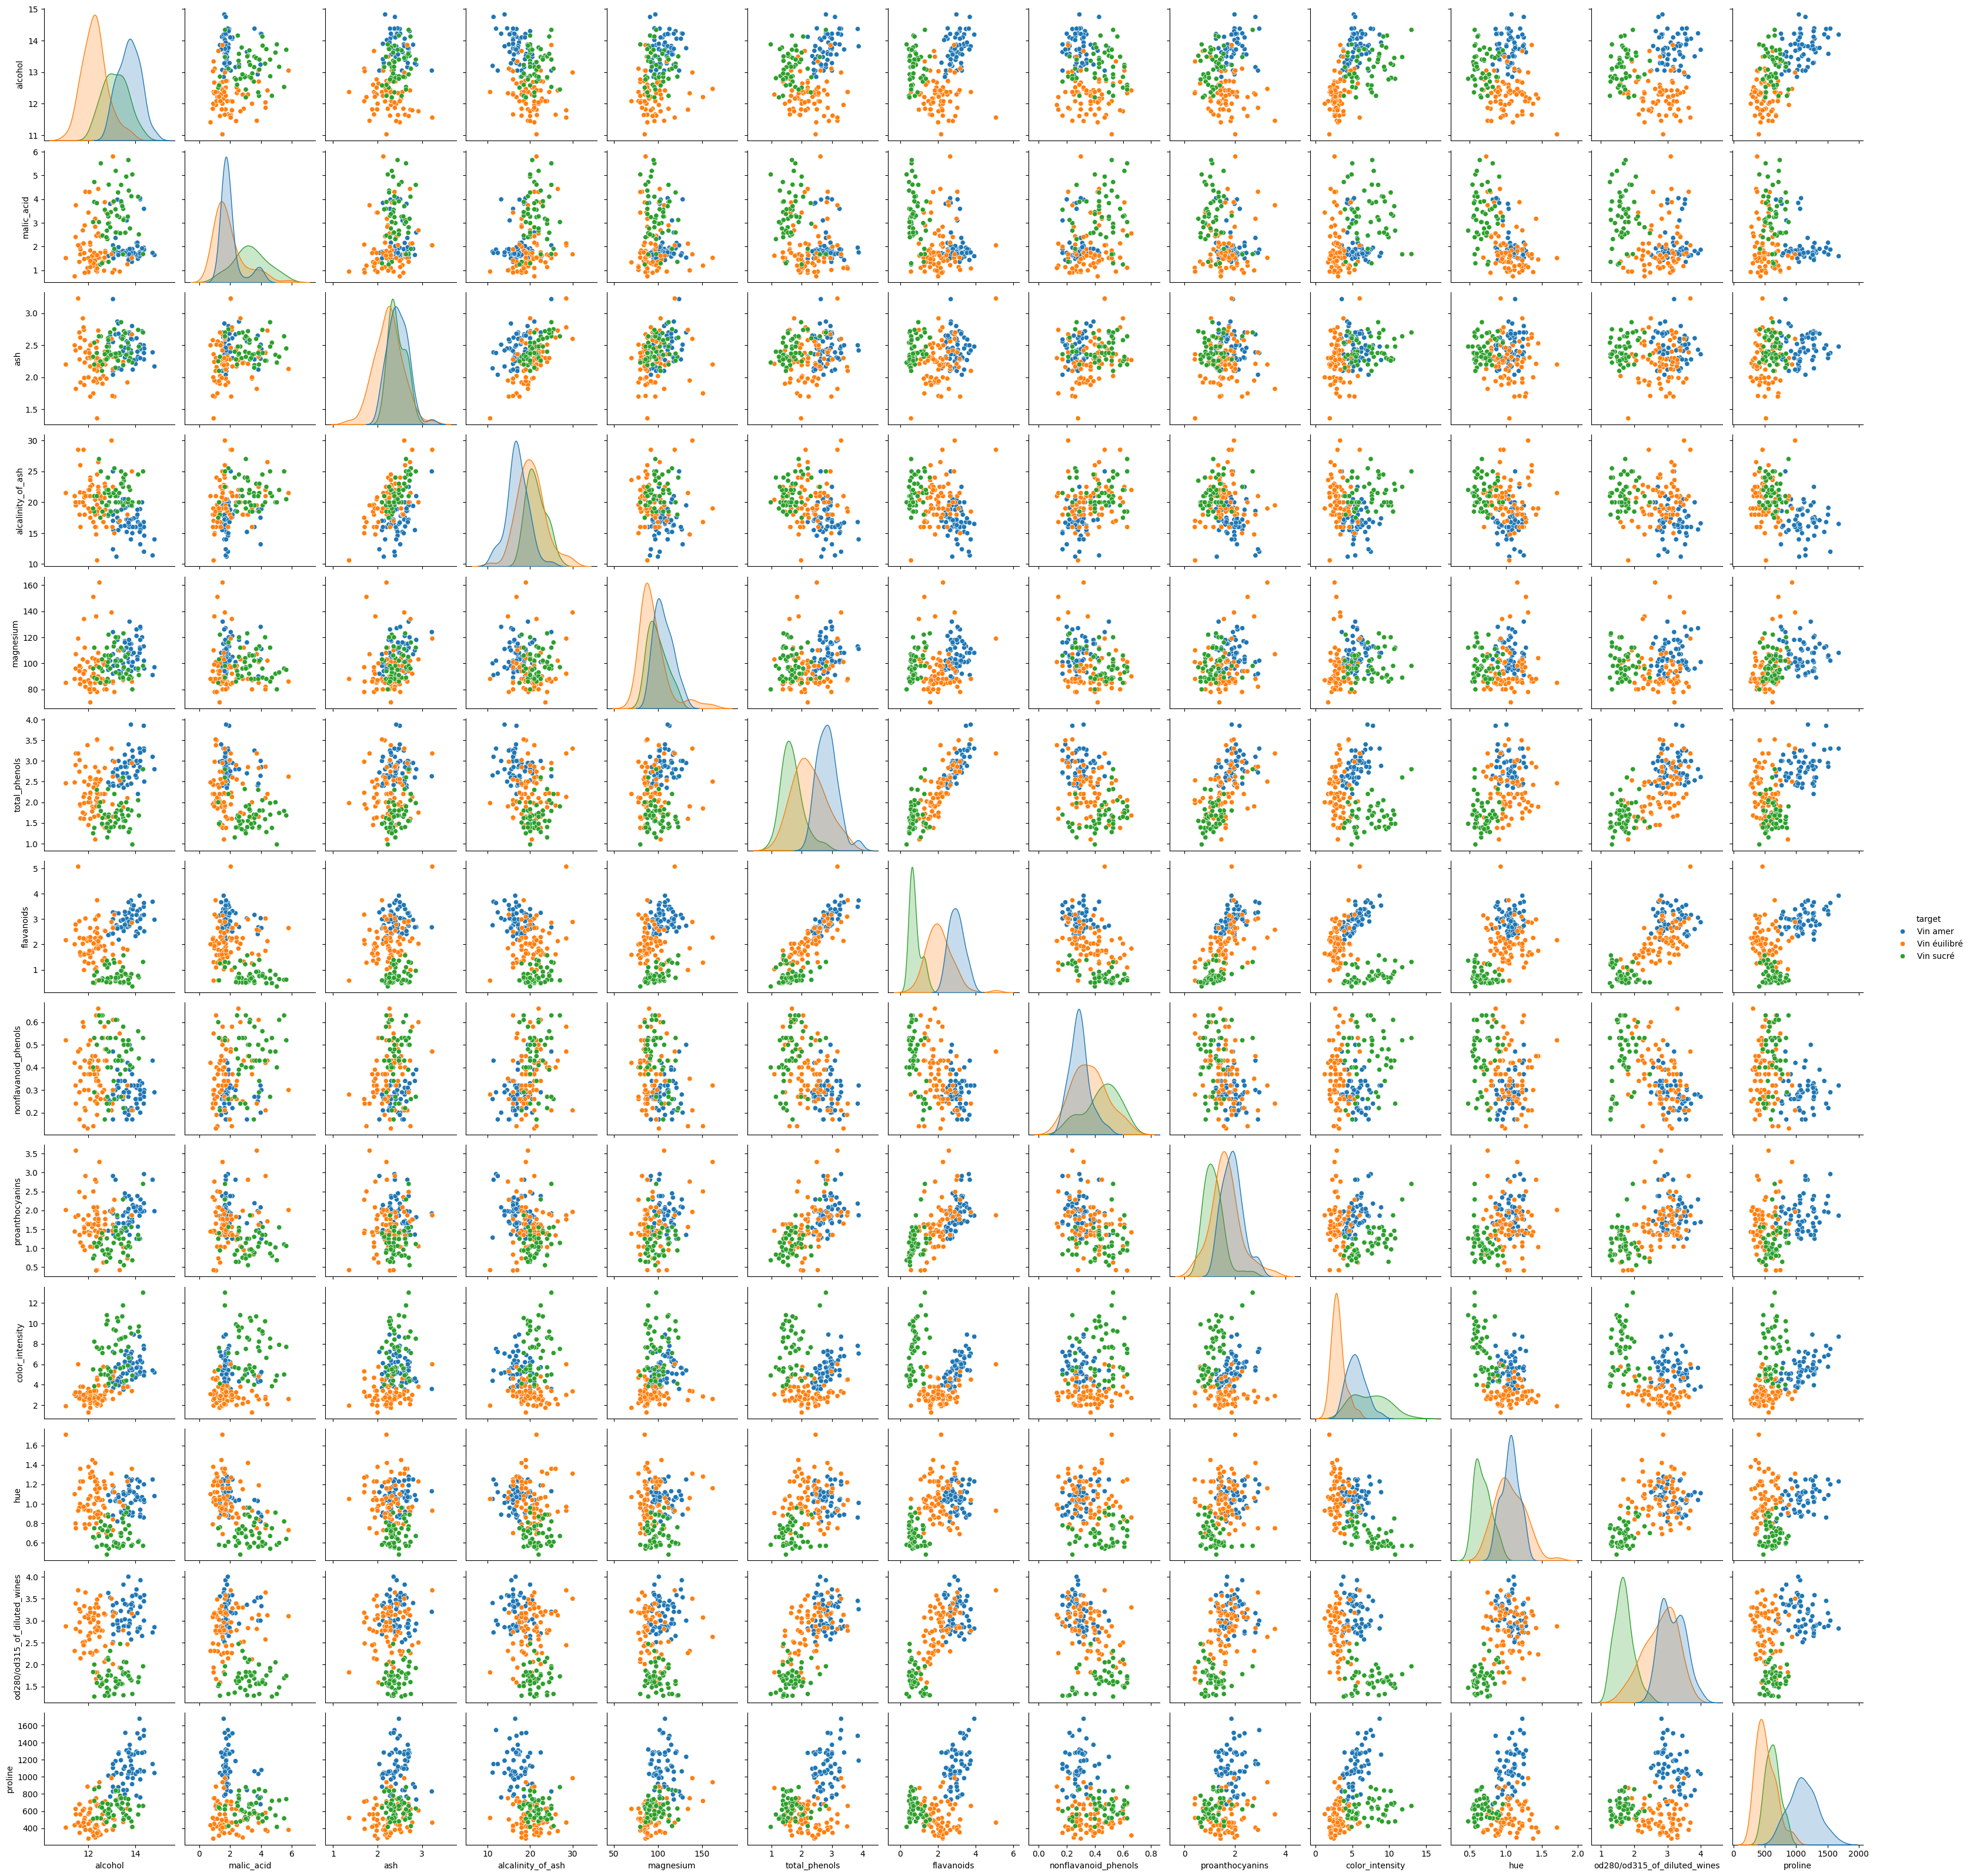

In [62]:
sns.pairplot(
    df_raw,
    hue="target",
)

#### Conclusion
Observations importantes sur les corrélations :
1. Variables fortement corrélées :
   - Certaines paires de variables montrent des corrélations >0.8
   - On pourrait envisager de ne garder qu'une variable par groupe fortement corrélé

2. Variables faiblement corrélées :
   - Ces variables apportent probablement des informations complémentaires
   - Elles sont particulièrement intéressantes pour la modélisation

3. Recommandations :
   - Envisager une sélection de features basée sur ces corrélations
   - Potentiellement utiliser des méthodes de réduction de dimensionnalité (PCA)

## 5. Normalisation des Données

Application d'une transformation de puissance (PowerTransformer) pour :
1. Normaliser la distribution des features
2. Réduire l'impact des outliers
3. Améliorer la performance des futurs modèles

Cette transformation est particulièrement utile pour les algorithmes sensibles à la distribution des données (comme les réseaux de neurones ou les SVM).

#### a. Application de PowerTransformer

In [52]:
transformer = preprocessing.PowerTransformer()

features = df_raw[features_cols]
target = df_raw["target"]

normalized_features = transformer.fit_transform(features)

df_normalized_features = pd.DataFrame(
    normalized_features,
    columns=features_cols,
    index=features.index
)

df_normalized = pd.concat([df_normalized_features, target], axis=1)

#### b. Analyse des distributions normalisées

In [53]:
df_normalized.describe()

alcohol    malic_acid           ash  alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean   1.397135e-15 -7.983626e-17  4.104083e-16       1.197544e-16   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.391801e+00 -2.499886e+00 -3.381922e+00      -2.878023e+00   
25%   -7.919543e-01 -5.934291e-01 -5.906960e-01      -6.743704e-01   
50%    5.248487e-02 -2.271120e-01 -4.780560e-02       2.827167e-02   
75%    8.340102e-01  8.911613e-01  6.888205e-01       6.185020e-01   
max    2.295157e+00  2.011020e+00  3.375841e+00       2.957861e+00   

          magnesium  total_phenols    flavanoids  nonflavanoid_phenols  \
count  1.780000e+02     178.000000  1.780000e+02          1.780000e+02   
mean  -2.675912e-13       0.000000  2.794269e-16         -3.193450e-16   
std    1.002821e+00       1.002821  1.002821e+00          1.002821e+00   
min   -3.262601e+00      -2.261135 -1.789932e+00         -2.309172e+00   
25%   -8.528415e-01      -0.875697 -8.068902e-01         -7.071081e-01   
50%    3.598419e-02       0.131859  1.467216e-01         -6.548854e-02   
75%    6.668120e-01       0.819950  8.554180e-01          6.954431e-01   
max    2.773776e+00       2.372251  2.795569e+00          2.012248e+00   

       proanthocyanins  color_intensity           hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean      3.193450e-16     2.232920e-16  4.390994e-16   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.483712e+00    -2.554528e+00 -2.123457e+00   
25%      -5.487426e-01    -7.775353e-01 -7.638443e-01   
50%       1.852778e-02     4.011172e-02  4.102315e-02   
75%       6.824732e-01     6.642065e-01  7.166530e-01   
max       2.871414e+00     2.337383e+00  3.231521e+00   

       od280/od315_of_diluted_wines       proline  
count                  1.780000e+02  1.780000e+02  
mean                  -5.987720e-16  3.113614e-15  
std                    1.002821e+00  1.002821e+00  
min                   -1.753691e+00 -2.265854e+00  
25%                   -9.778614e-01 -7.521447e-01  
50%                    1.799656e-01 -2.177424e-02  
75%                    7.790801e-01  8.813840e-01  
max                    2.179414e+00  2.091164e+00

<Axes: >

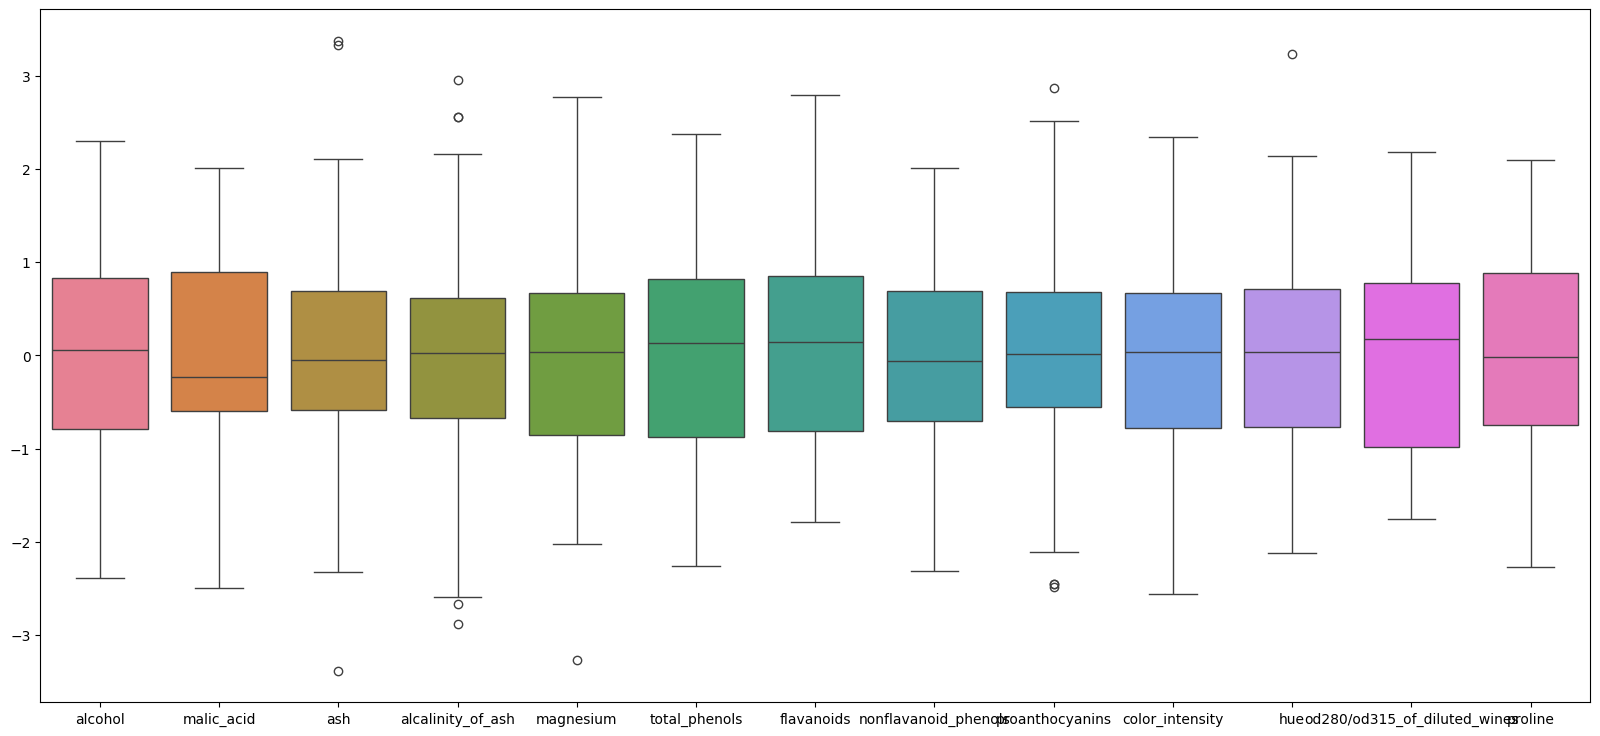

In [55]:
f, ax = plt.subplots(figsize=(20, 9))
sns.boxplot(data=df_normalized[features_cols], ax=ax)

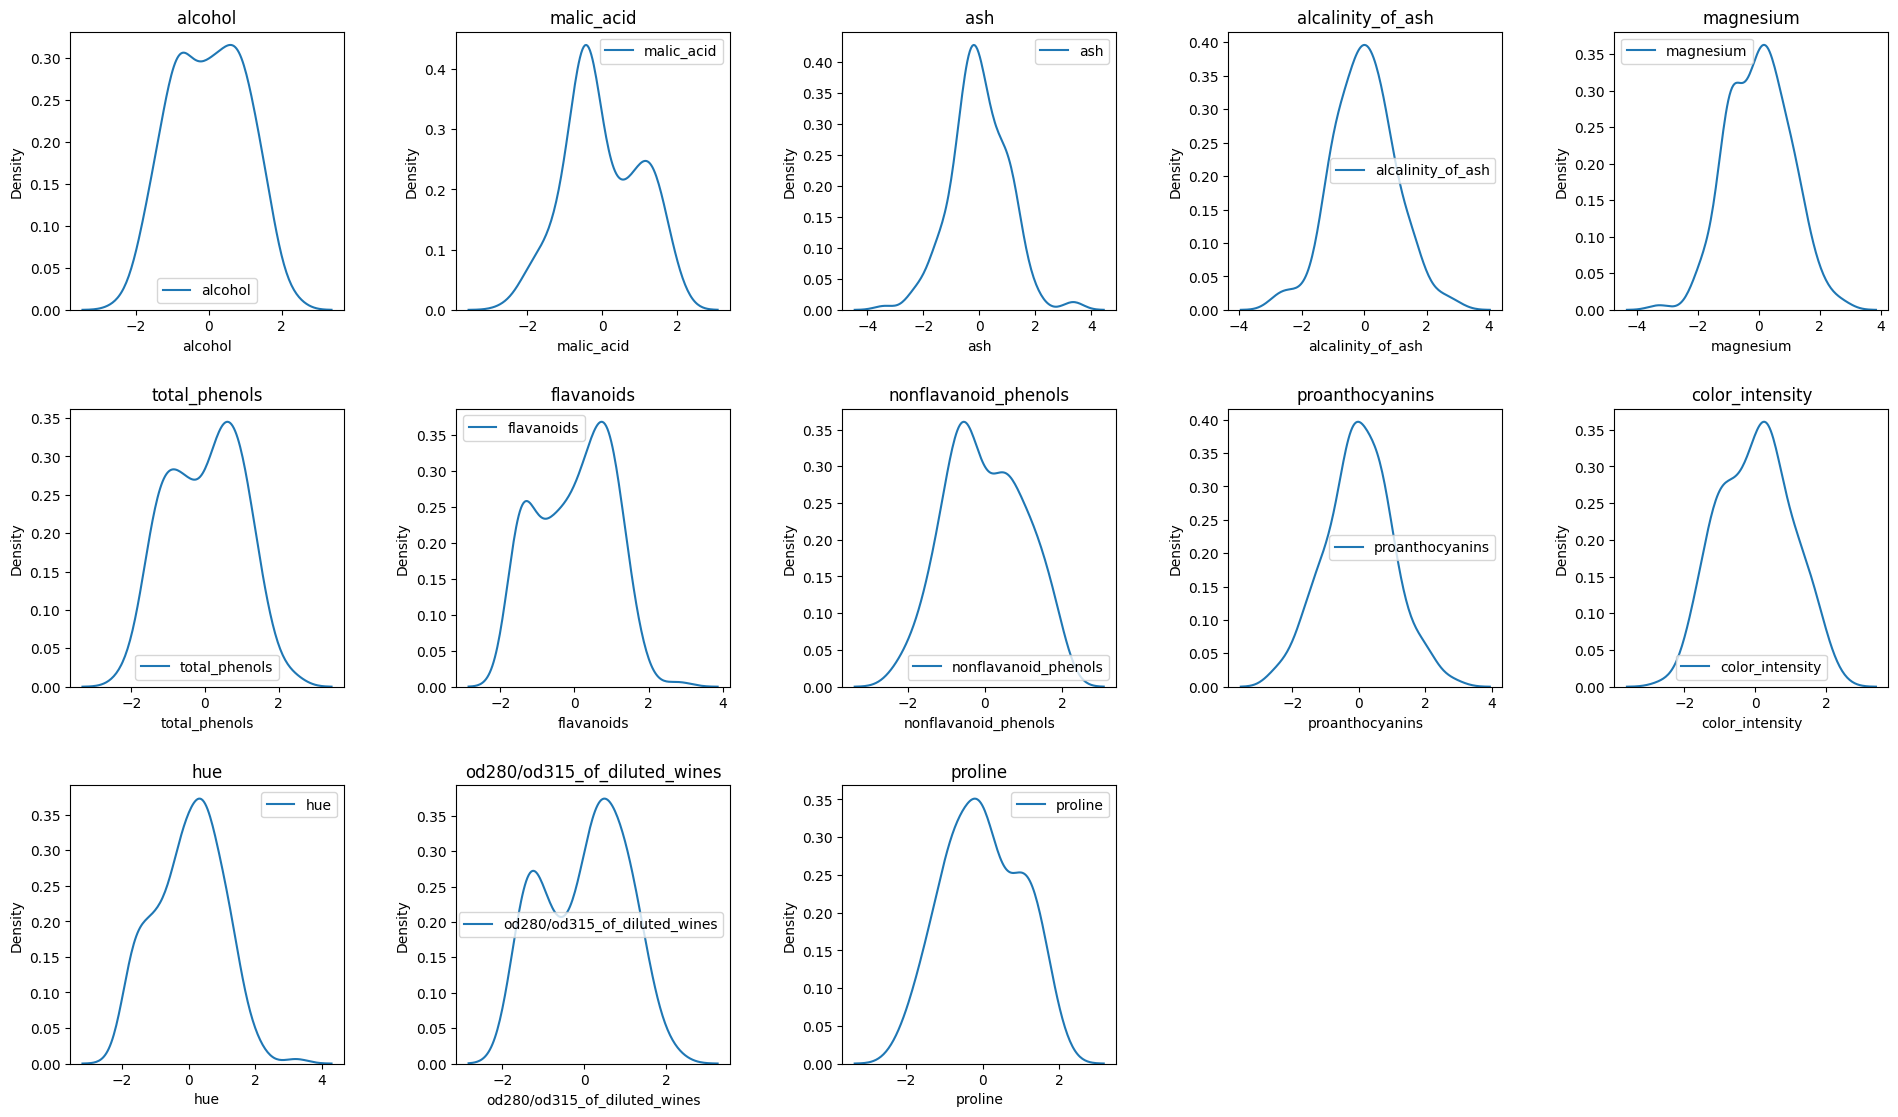

In [58]:
n_cols = 5
n_rows = math.ceil(len(features_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.tight_layout(pad=5.0)

axs = axs.flatten()

for i, col in enumerate(features_cols):
    sns.kdeplot(df_normalized[col], ax=axs[i], label=col)
    axs[i].set_title(col)
    axs[i].legend()

for j in range(len(features_cols), len(axs)):
    axs[j].axis('off')

plt.show()

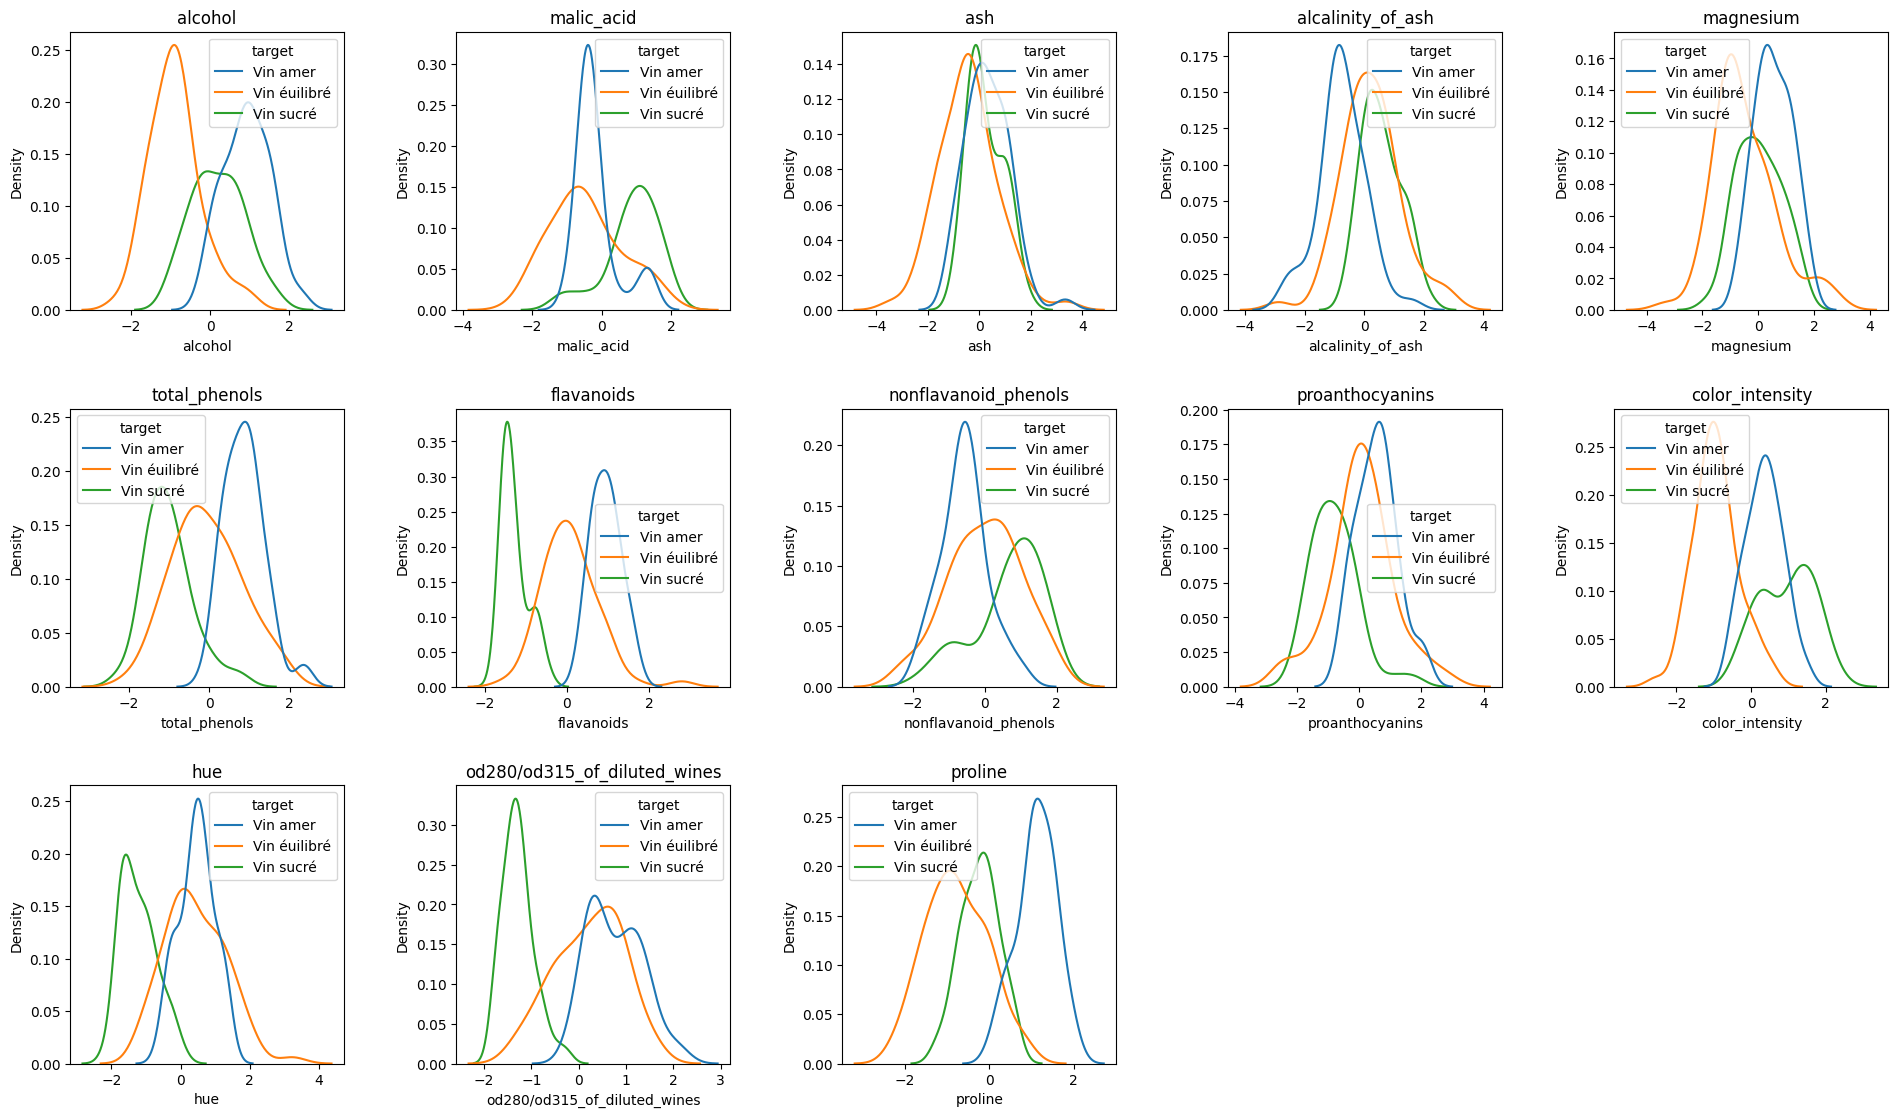

In [59]:
n_cols = 5
n_rows = math.ceil(len(features_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.tight_layout(pad=5.0)

axs = axs.flatten()

for i, col in enumerate(features_cols):
    sns.kdeplot(data=df_normalized[[col, 'target']], x=col, hue='target', ax=axs[i])
    axs[i].set_title(col)

for j in range(len(features_cols), len(axs)):
    axs[j].axis('off')

plt.show()